In [88]:
import requests
import plotly.graph_objects as go

base = f'http://localhost:8000'

## Iron Condor
1. Buy one OTM call with strike above current
2. Sell one ATM call with strike price above/closer to current
3. Buy one OTM put with strike below current
4. Sell one ATM put with strike lower/closer to current


In [144]:
#               3   4        current      2   1
# 0 ------------|---|----------|----------|---|------------

In [98]:
# get options
def get_options(symbol):
    url = f'{base}/options?symbol={symbol}'
    resp = requests.get(url)
    return resp.json()

def get_option(id):
    url = f'{base}/option?id={id}'
    resp = requests.get(url)
    return resp.json()

def get_last(symbol):
    url = f'{base}/last?symbol={symbol}'
    resp = requests.get(url)
    return float(resp.json())

In [99]:
s = 'MSFT'
# data = get_option(s)
last = get_last(s)
puts = data['puts']
calls = data['calls']

# get all strikes
strikes = [float(s['strike_price']) for s in puts]
strikes.sort()
i=0
while strikes[i] < last:
    i+=1
    
puts = {float(p['strike_price']):p for p in puts}
calls = {float(p['strike_price']):p for p in calls}
    
print(f"LAST: {last}")
upper = strikes[i:i+10]
lower = strikes[i-10:i][::-1]



print(f"upper: {upper}")
print(f"lower: {lower}")

LAST: 350.98
upper: [352.5, 355.0, 357.5, 360.0, 362.5, 365.0, 367.5, 370.0, 372.5, 375.0]
lower: [350.0, 347.5, 345.0, 342.5, 340.0, 337.5, 335.0, 332.5, 330.0, 327.5]


Last: 350.98
Strike Price: 352.5
Ask: 10.6
Breakeven: 342.020000
Max Loss: 1060.0

{'adjusted_mark_price': '10.480000', 'adjusted_mark_price_round_down': '10.470000', 'ask_price': '10.600000', 'ask_size': 1, 'bid_price': '10.350000', 'bid_size': 1, 'break_even_price': '342.020000', 'high_price': '13.450000', 'instrument': 'https://api.robinhood.com/options/instruments/bd2085c1-fb4e-4412-89a4-a00d7516d733/', 'instrument_id': 'bd2085c1-fb4e-4412-89a4-a00d7516d733', 'last_trade_price': '10.450000', 'last_trade_size': 1, 'low_price': '9.550000', 'mark_price': '10.475000', 'open_interest': 1497, 'previous_close_date': '2023-07-24', 'previous_close_price': '14.250000', 'updated_at': '2023-07-25T19:59:59.995298816Z', 'volume': 623, 'symbol': 'MSFT', 'occ_symbol': 'MSFT  230728P00352500', 'state': 'active', 'chance_of_profit_long': '0.366286', 'chance_of_profit_short': '0.633714', 'delta': '-0.508819', 'gamma': '0.016320', 'implied_volatility': '0.844279', 'rho': '-0.012860', 'theta': '-1.9357

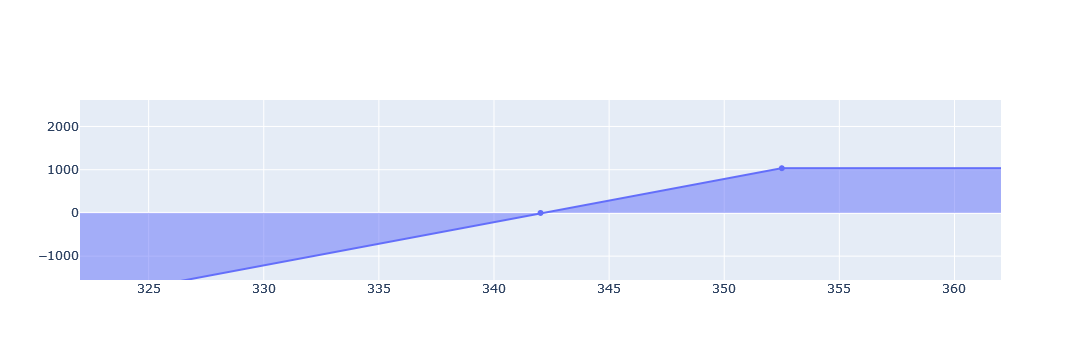

In [138]:
# first tier

fig = go.Figure()

upp = upper[0]
low = lower[0]

upp_put = puts[upp]
low_put_id = puts[low]['id']
upp_call_id = calls[upp]['id']
low_call_id = calls[low]['id'] 


uput = get_option(upp_put['id'])
ask = float(uput['ask_price'])
breakeven = float(uput['break_even_price'])
max_loss = float(uput['ask_price'])*100

print(f"Last: {last}")
print(f"Strike Price: {upp}")
print(f"Ask: {float(uput['ask_price'])}")
print(f"Breakeven: {uput['break_even_price']}")
print(f"Max Loss: {float(uput['ask_price'])*100}")

print()
print(uput)

# BUY PUT PLOT
# fig.add_trace(go.Scatter(
#     x=[500,upp,breakeven, 0],
#     y=[-max_loss,-max_loss,0,(breakeven*100)-ask],
#     fill='tozeroy'
# ))
# fig.update_xaxes(range=[breakeven - 20, breakeven + 20])
# fig.update_yaxes(range=[-max_loss*1.5, max_loss+max_loss*1.5])

# SELL PUT PLOT
bid = float(uput['bid_price'])
fig.add_trace(go.Scatter(
    x = [0,breakeven,upp,500],
    y = [-breakeven*100,0,bid*100,bid*100],
    fill='tozeroy'
))
fig.update_xaxes(range=[breakeven-20, breakeven+20])
fig.update_yaxes(range=[-bid*100*1.5, max_loss+bid*100*1.5])


In [145]:
# calc max profit
# max profit = net credit recieved - commissions and fees
# max loss = width of call strikes - net credit - commissions and fees
